In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import networkx as nx

# Data processing

In [95]:
data = pd.read_csv("student_data.csv", delimiter = ',')
data

,Roll No,Sem,Sub1,Sub2,Sub3,Sub4,Sub5
0,1,1,A,B,C,D,E
1,2,1,A,B,C,D,NaN
2,3,1,A,B,C,D,NaN
3,4,1,A,B,C,E,NaN
4,5,1,A,B,C,D,NaN
5,1,2,E,F,G,H,NaN
6,2,2,A,B,E,F,G
7,3,2,B,E,F,G,H
8,4,2,A,B,E,F,NaN
9,5,2,B,F,G,H,NaN


In [96]:
df = pd.DataFrame(data)
sem = df['Sem'].unique()
s = len(sem)
print(f"\nSem: {sem} Distinct: {s}")

count = [[]*5]*s #5 is the maximum number of subjects
students = []
subjects = {}
i = 0

for s1,s2,s3,s4,s5 in zip(df['Sub1'],df['Sub2'],df['Sub3'],df['Sub4'],df['Sub5']):
    if s1 not in subjects and s1 == s1:
        subjects.update({s1:i})
        i=i+1
    elif s2 not in subjects and s2 == s2:
        subjects.update({s2:i})
        i=i+1
    elif s3 not in subjects and s3 == s3:
        subjects.update({s3:i})
        i=i+1
    elif s4 not in subjects and s4 == s4:
        subjects.update({s4:i})
        i=i+1
    elif s5 not in subjects and s5 == s5:
        subjects.update({s5:i})
        i=i+1
print("\nTotal Number of subject is:",len(subjects))


Sem: [1 2 3 4] Distinct: 4

Total Number of subject is: 15


# Tabulating the subjects semester wise

In [97]:
matrix = [[0 for i in range(len(subjects))] for j in range(s)]
#initalizing matrix
for s1,s2,s3,s4,s5,sem in zip(df['Sub1'],df['Sub2'],df['Sub3'],df['Sub4'],df['Sub5'],df['Sem']):
    if s1 == s1:
        matrix[sem-1][subjects[s1]]=1
    if s2 == s2:
        matrix[sem-1][subjects[s2]]=1
    if s3 == s3:
        matrix[sem-1][subjects[s3]]=1
    if s4 == s4:
        matrix[sem-1][subjects[s4]]=1
    if s5 == s5:
        matrix[sem-1][subjects[s5]]=1
        

Student_mat=pd.DataFrame(matrix, columns=subjects.keys())
print("\n\nList of Subject semester wise:")
Student_mat



List of Subject semester wise:


,A,B,C,E,D,F,G,H,I,J,K,M,N,L,O
0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0
2,1,1,0,1,0,0,0,1,1,1,1,0,0,0,0
3,1,0,1,0,0,0,0,0,0,1,1,1,1,1,1


In [98]:
reverse = dict(zip(subjects.values(), subjects.keys()))

# Generating graphs

Complete Graph for Subject of Sem 1 :
['A', 'B', 'C', 'E', 'D']


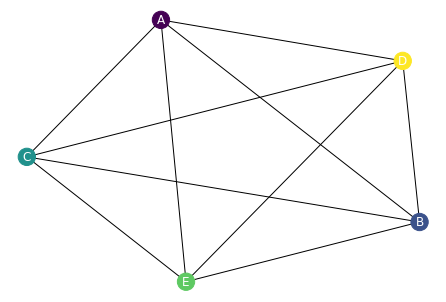

Complete Graph for Subject of Sem 2 :
['A', 'B', 'E', 'F', 'G', 'H']


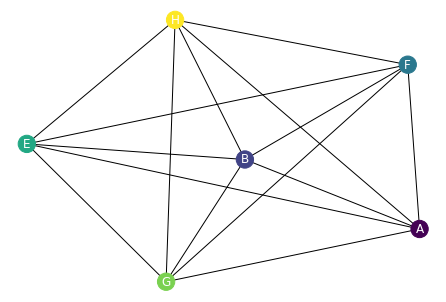

Complete Graph for Subject of Sem 3 :
['A', 'B', 'E', 'H', 'I', 'J', 'K']


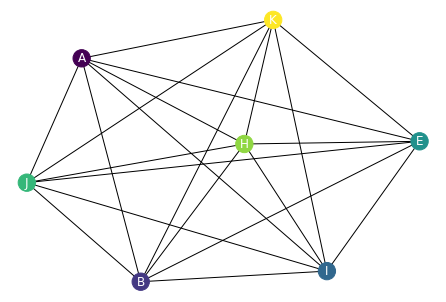

Complete Graph for Subject of Sem 4 :
['A', 'C', 'J', 'K', 'M', 'N', 'L', 'O']


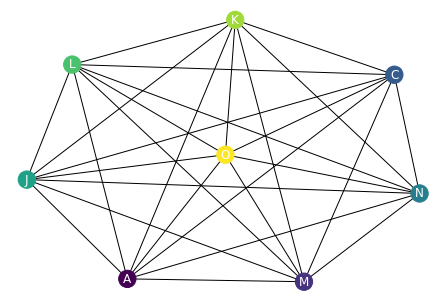

In [105]:
color_subjects={}
datesheet=[[]]
CompleteGraph = nx.Graph()
k=1
x=1
#1st chromatic no.
for i in range(0,s):
    sub=[] #sub will contain subs in each sem
    G = nx.Graph()
    for j in range(0,len(subjects)):
        if matrix[i][j]==1:
            sub.append(reverse[j]) #sem wise subject list
    datesheet.append(sub)

    #removing colors that have been used
    chromatic=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
    for y in range(0,i):
        for z in range(0,len(subjects)):
            if matrix[y][z] == 1 and reverse[z] in sub and color_subjects[reverse[z]] in chromatic:
                chromatic.remove(color_subjects[reverse[z]])    
    index=0
    for subject in range(0,len(sub)):
        if sub[subject] not in color_subjects.keys():
            color_subjects.update({sub[subject]:chromatic[index]})
            index=index+1
    print("Complete Graph for Subject of Sem",(x)%5,":")
    print(sub)
    x+=1
    G.add_nodes_from(sub)
    
    G.add_edges_from(itertools.combinations(sub, 2))
    values = [color_subjects.get(node,0.25) for node in G.nodes()]
    CompleteGraph.add_nodes_from(sub)
    CompleteGraph.add_edges_from(itertools.combinations(sub, 2), weight =8)
    nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='white')
    plt.show()

Graph for All Subjects


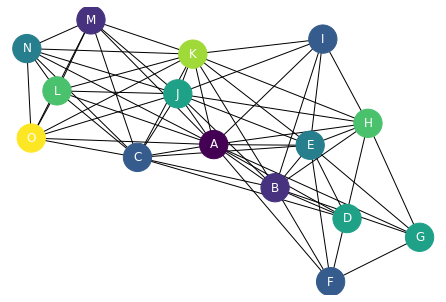

In [102]:
print("Graph for All Subjects")
values = [color_subjects.get(node,0.25) for node in CompleteGraph.nodes()]
nx.draw(CompleteGraph, node_size=800, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='white')
nx.draw
plt.show()

# Result

In [103]:
print("Colors alloted to Each Subject")
for i,j in zip(color_subjects.keys(),color_subjects.values()):
    print(i,"-",j)

Colors alloted to Each Subject
A - 0
B - 1
C - 2
E - 3
D - 4
F - 2
G - 4
H - 5
I - 2
J - 4
K - 6
M - 1
N - 3
L - 5
O - 7


In [104]:
data=np.chararray((4,9),unicode=True)
for i in range(0,s):
    for j in range(0,len(subjects)):
        if matrix[i][j] == 1:
            data[i][1+color_subjects[reverse[j]]]=str(reverse[j])
final = pd.DataFrame(data, columns = ['Sem', 'Slot1','Slot2','Slot3','Slot4','Slot5','Slot6','Slot7','Slot8'])
for i in range(0,s):
    final.at[i,'Sem']=(df['Sem'].unique()[(i)%s])

print("\nFinal Schedule For Each Semester:")
final


Final Schedule For Each Semester:


,Sem,Slot1,Slot2,Slot3,Slot4,Slot5,Slot6,Slot7,Slot8
0,1,A,B,C,E,D,,,
1,2,A,B,F,E,G,H,,
2,3,A,B,I,E,J,H,K,
3,4,A,M,C,N,J,L,K,O
